### Noblige-1 fluid inclusion plot using Plotly interactive subplots

Noblige-1 is a petroleum exploration well drilled by Woodside Energy Ltd. on the Outer Exmouth Plateau, offshore Western Australia.

This notebook demostrates the following:

1. Importing various data types from various sources (las, csv and PDF files)
2. Cleaning data where required (mostly in Python, some in Excel)
3. Creation of a vsualisation plot of several parameters acquired while drilling the well, and from post-well analysis.

The raw data includes petrophysical logs, fluid inclusion data, and stratigraphic information.

All data is open-file and publicly available, and was downloaded from https://nopims.dmp.wa.gov.au/nopims

In [1]:
# Import the various modules required

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
import lasio
import tabula as tb

In [2]:
# Function to read and clean log and FIS data

def read_data(logs_fname, FIS_fname):
    global logs 
    logs = lasio.read(logs_fname).df()
    global FIS
    FIS = lasio.read(FIS_fname).df()

In [4]:
# Function call to read data

read_data("Data/NOBLIGE_1_22_09_10SCALAR.las", "Data/Noblige-1_FI100091b_1.las")

In [5]:
# Reset log dataframe index

logs.reset_index(inplace=True)

In [6]:
# Assign log and FIS data to variable names

GR = logs['GR']
C1 = FIS['CH4']
C2 = FIS['C2H6']
P = FIS['PARAFINS57']
AN = FIS['ALKNAPHTH']
depth1 = logs['DEPTH']
depth2 = FIS['DEPTH']

In [7]:
# Read stratigraphy from Well Completion Report (PDF)

strat_table = tb.read_pdf("Data/Noblige_1_WCR_Interpretive_Data.pdf",
                            pages=[13, 14],
                            pandas_options={'header': None})

# Concatenate stratigraphy into one dataframe

for strat in strat_table:
    strat = pd.concat(strat_table)
    
# Export to csv for cleaning in Excel
    
strat.to_csv("Data/Noblige-1_strat_messy.csv", 
             index=False)

In [8]:
# Import stratigraphic picks

Picks = pd.read_csv("Data/Noblige-1_strat_clean.csv")

# Create list of x plot values

Picks_x = []

for i in range(len(Picks)):
        Picks_x.append(250)    # x plot value of 250 (max of GR axis)
    
# Add Picks_x column to Picks dataframe

Picks['picks_x'] = Picks_x

# Assign formation data to variable names

Fm_depth = Picks['Actual Depth (mTVDss MSL)']
Fm_name = Picks['Marker']
Fm_x = Picks['picks_x']

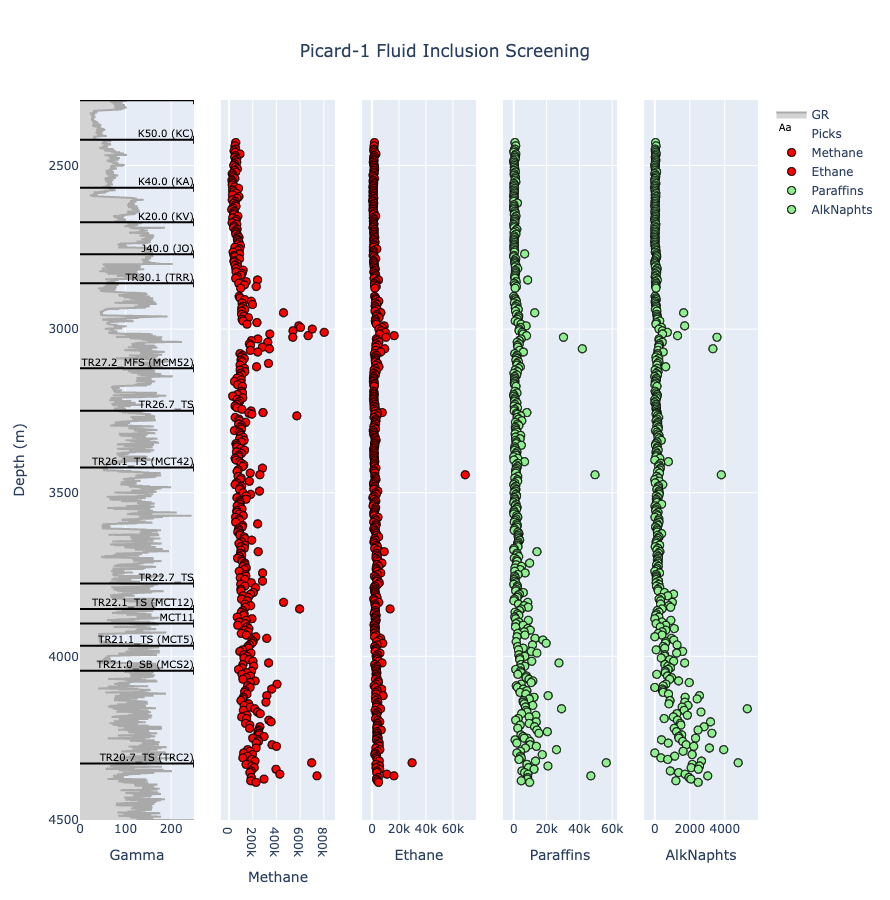

In [18]:
# Configure and display plot with Plotly make_subplots()

fig = make_subplots(rows=1, cols=5, shared_yaxes=True)

# Gamma ray with color fill

fig.add_trace(go.Scatter(x=GR, y=depth1, 
                         name='GR',
                         line=dict(color='darkgrey'),
                         fill='tozerox',
                         fillcolor = 'lightgrey'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=Fm_x, 
                         y=Fm_depth, 
                         name='Picks', 
                         line=dict(color='black'), 
                         mode='text', 
                         error_x=dict(type='constant', 
                                      symmetric=False, 
                                      value=0, 
                                      valueminus=300, 
                                      color='black'), 
                         text=Fm_name, 
                         textposition='top left', 
                         textfont=dict(color='black'),
                         textfont_size=10), 
              row=1, col=1)

fig.add_trace(go.Scatter(x=C1, y=depth2, 
                         name='Methane', 
                         line=dict(color='black'), 
                         mode='markers', 
                         marker=dict(size=8, 
                                     line=dict(width=1), 
                                     color='red')), 
              row=1, col=2)

fig.add_trace(go.Scatter(x=C2, y=depth2, 
                         name='Ethane', 
                         line=dict(color='black'), 
                         mode='markers',
                         marker=dict(size=8, 
                                     line=dict(width=1), 
                                     color='red')), 
              row=1, col=3)

fig.add_trace(go.Scatter(x=P, y=depth2, 
                         name='Paraffins', 
                         line=dict(color='black'), 
                         mode='markers',
                         marker=dict(size=8, 
                                     line=dict(width=1), 
                                     color='lightgreen')), 
              row=1, col=4)

fig.add_trace(go.Scatter(x=AN, y=depth2, 
                         name='AlkNaphts', 
                         line=dict(color='black'), 
                         mode='markers',
                         marker=dict(size=8, 
                                     line=dict(width=1), 
                                     color='lightgreen')), row=1, col=5)

fig.update_xaxes(title_text='Gamma', 
                 row=1, col=1, 
                 type='linear', 
                 range=[0, 250])

fig.update_xaxes(title_text='Methane', 
                 row=1, col=2, 
                 type='linear')

fig.update_xaxes(title_text='Ethane', 
                 row=1, col=3, 
                 type='linear')

fig.update_xaxes(title_text='Paraffins', 
                 row=1, col=4, 
                 type='linear')

fig.update_xaxes(title_text='AlkNaphts', 
                 row=1, col=5, 
                 type='linear')

fig.update_yaxes(title_text='Depth (m)', 
                 row=1, col=1, 
                 range=[4500, 2300])

fig.update_layout(template='plotly',
                  height=900, 
                  title={'text':'Noblige-1 Fluid Inclusion Screening',
                         'y':0.95,
                         'x':0.5,                         
                         'xanchor':'center',                         
                         'yanchor':'top'})

                 
fig.show()
fig.write_html("Noblige-1_fluid_inclusion_plot_interactive.html", 
               include_plotlyjs='cdn')